In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('input_data.csv')

df[:4]

,ID,City,State,Revenue,Latitude,Longitude
0,1,Bloomington,Minnesota,1842093,44.8408,-93.2983
1,2,Lehi,Utah,1543467,40.3916,-111.8508
2,3,Cupertino,California,1100000,37.3229,-122.0322
3,4,Oakland,California,817893,37.8044,-122.2711


In [3]:
# -----------------------------
# 3. KMeans clustering (17 clusters)
# -----------------------------
#X = df[["Latitude", "Longitude"]].values
#kmeans = KMeans(n_clusters=17, random_state=42)
#df["Cluster"] = kmeans.fit_predict(X)

#df[:4]

In [4]:
# -----------------------------
# 3. Balanced clustering (roughly equal number of elements per cluster)
# -----------------------------

# Data selction & Number of Representatives ('clusters')

# List of IDs to remove CASE 2
#ids_to_remove = [] # CASE 1
#ids_to_remove = [1,2,3,4,5,6,8,17,20,38,39,61,79,101,109,131,133,134] #CASE 2
ids_to_remove = [1,8,57,65,82,93,111,112,115,126] # CASE 3

# Remove rows where 'ID' is in ids_to_remove
df = df[~df['ID'].isin(ids_to_remove)]

#num_clusters = 17 # MODEL 1
#num_clusters = 15 # MODEL 2
num_clusters = 17 # MODEL 3

n = len(df)


Revenue sum per Representative:
    Cluster  Revenue
0         0   828783
1         1  1599461
2         2  1202916
3         3  1016703
4         4  1092824
5         5  1001911
6         6  2163429
7         7  1233090
8         8  1943989
9         9   803190
10       10   780081
11       11  2716664
12       12  1416163
13       13  1358732
14       14  1767852
15       15   991890
16       16  1566420

IDs per Representative:
Rep 0: [77, 104, 130, 84, 37, 88, 40, 136]
Rep 1: [144, 15, 103, 67, 135, 23, 91, 7]
Rep 2: [30, 48, 78, 105, 127, 70, 69, 16]
Rep 3: [64, 76, 131, 134, 117, 26, 27, 56]
Rep 4: [60, 28, 45, 75, 96, 108, 81, 38]
Rep 5: [61, 33, 89, 35, 58, 80, 118, 125]
Rep 6: [43, 86, 19, 49, 3, 95, 92, 62]
Rep 7: [138, 6, 101, 114, 90, 141, 79, 34]
Rep 8: [39, 63, 99, 102, 20, 21, 4, 140]
Rep 9: [129, 128, 143, 24, 146, 22, 113, 123]
Rep 10: [46, 59, 121, 66, 54, 137, 109, 133]
Rep 11: [29, 94, 10, 87, 83, 124, 2, 55]
Rep 12: [14, 36, 110, 98, 32, 41, 47, 51]
Rep 13: [72, 1

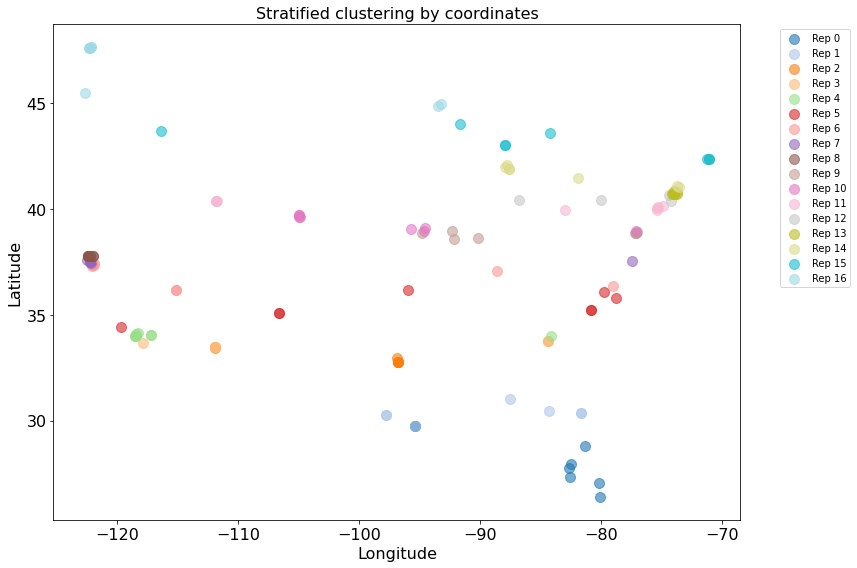

In [5]:
#: sort by Latitude then Longitude (can also try other orderings)
df_sorted = df.sort_values(by=["Latitude", "Longitude"]).reset_index(drop=True)

# Assign cluster labels sequentially
cluster_size = n // num_clusters
remainder = n % num_clusters

clusters = []
start_idx = 0
for i in range(num_clusters):
    end_idx = start_idx + cluster_size
    if i < remainder:
        end_idx += 1  # distribute remainder
    clusters.extend([i]*(end_idx - start_idx))
    start_idx = end_idx

df_sorted["Cluster"] = clusters

# Restore original order if needed
df = df_sorted


# -----------------------------
# 4. Sum of Revenue per cluster
# -----------------------------
cluster_revenue = df.groupby("Cluster")["Revenue"].sum().reset_index()
cluster_revenue = cluster_revenue.sort_values("Cluster")

print("\nRevenue sum per Representative:")
print(cluster_revenue)

# -----------------------------
# 5. List of IDs per cluster
# -----------------------------
cluster_ids = {}
for cluster in sorted(df["Cluster"].unique()):
    cluster_ids[cluster] = df[df["Cluster"]==cluster]["ID"].tolist()

print("\nIDs per Representative:")
for cluster, ids in cluster_ids.items():
    print(f"Rep {cluster}: {ids}")

# -----------------------------
# 6. Scatter plot of clusters
# -----------------------------
plt.figure(figsize=(12,8))
colors = plt.cm.get_cmap("tab20", 17)

for cluster in sorted(df["Cluster"].unique()):
    subset = df[df["Cluster"]==cluster]
    plt.scatter(subset["Longitude"], subset["Latitude"], 
                s=100, label=f"Rep {cluster}", alpha=0.6, 
                c=[colors(cluster)])

plt.xlabel("Longitude", size =16)
plt.ylabel("Latitude", size =16)
plt.xticks(size =16)
plt.yticks(size =16)
plt.title("Stratified clustering by coordinates",size =16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("map_case_3.pdf", format='pdf')
plt.show()